In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")  # ignore warnings

In [2]:
data = pd.read_csv("data.csv")
data.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data.rename(columns={"diagnosis": "target"}, inplace=True)
data.target.value_counts()

B    357
M    212
Name: target, dtype: int64

In [4]:
data["target"] = [1 if i.strip() == "M" else 0 for i in data.target]  # M=1, B=0
data

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
data.shape

(569, 31)

In [6]:
data.info()  # no null value. all data is numeric. no need to label encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
data.describe()  # Data is not scaled. We need to scale it.

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


EDA: Exploratory Data Analysis: EDA is for visualization and understanding the data.
Correlation: Correlation is for understanding the relationship between features.

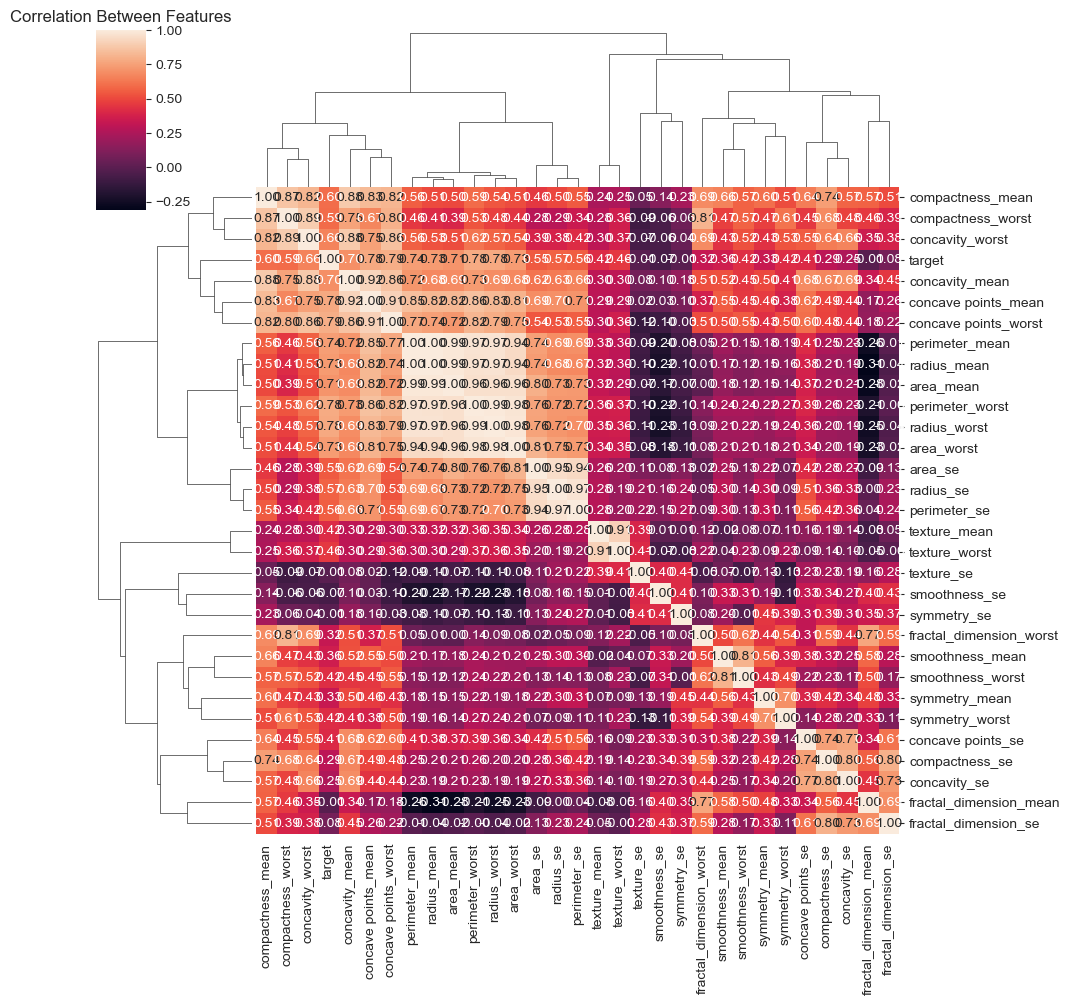

In [8]:

corr_matrix = data.corr()  # correlation matrix. It is for understanding the relationship between features. Just for numeric data. Not for categorical data (string).
sns.clustermap(corr_matrix, annot=True, fmt=".2f")  # annot=True: show the values. fmt=".2f": show the values with 2 digits after comma. Clustermap: to see the correlation between features.
plt.title("Correlation Between Features")
plt.show()

Feature of correlation: If correlation is bigger than 0.5, we can consider it as a good correlation. If correlation is smaller than -0.5, we can consider it as a bad correlation. Redius_mean and perimeter_mean are highly correlated. radius_worst and perimeter_worst are highly correlated.

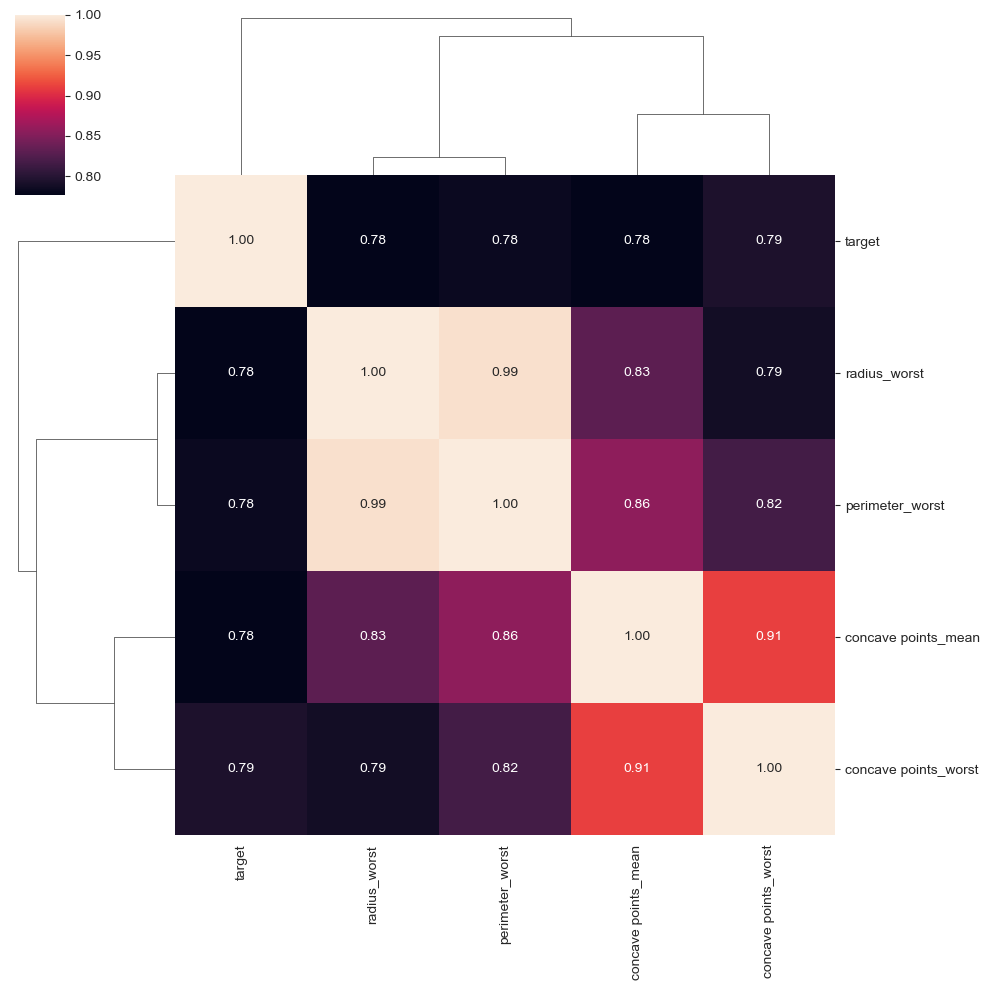

In [9]:
threshold = 0.75 # threshold for correlation. I want to see the features which have correlation bigger than 0.75
filtre = np.abs(corr_matrix["target"]) > threshold  #
corr_features = corr_matrix.columns[filtre].tolist()  # features which have correlation bigger than 0.75
sns.clustermap(data[corr_features].corr(), annot=True, fmt=".2f")

There some correlated features. We need to eliminate them.

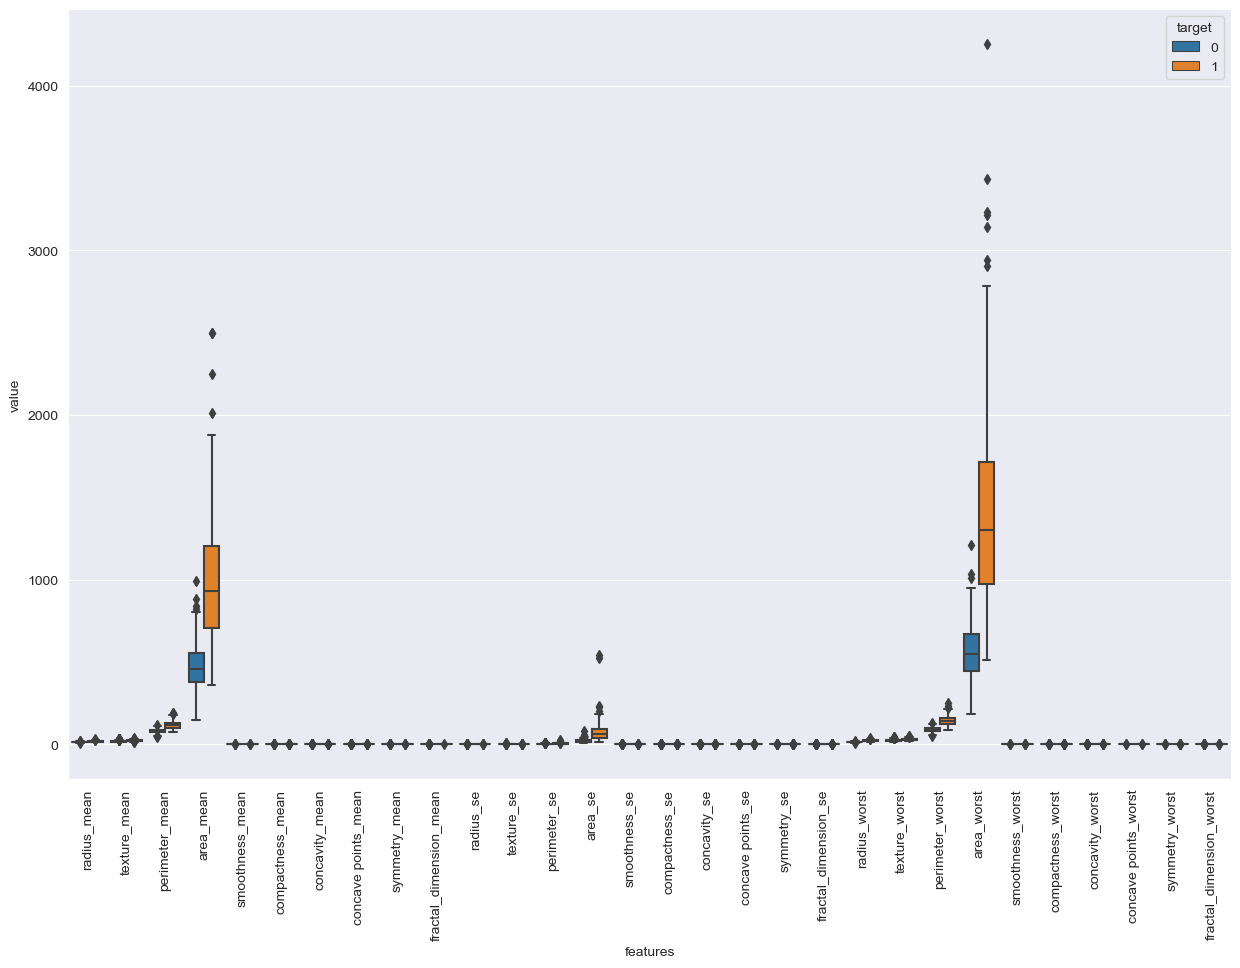

,target,features,value
0,1,radius_mean,17.99000
1,1,radius_mean,20.57000
2,1,radius_mean,19.69000
3,1,radius_mean,11.42000
4,1,radius_mean,20.29000
...,...,...,...
17065,1,fractal_dimension_worst,0.07115
17066,1,fractal_dimension_worst,0.06637
17067,1,fractal_dimension_worst,0.07820
17068,1,fractal_dimension_worst,0.12400


In [10]:
data_melted = pd.melt(data, id_vars="target", var_name="features", value_name="value")  # melt: to see the correlation between features.
plt.figure(figsize=(15, 10))
sns.boxplot(x="features", y="value", hue="target", data=data_melted) # hue: to see the correlation between features.    # boxplot: to see the outliers
plt.xticks(rotation=90)  # to see the features vertically
plt.show()
data_melted

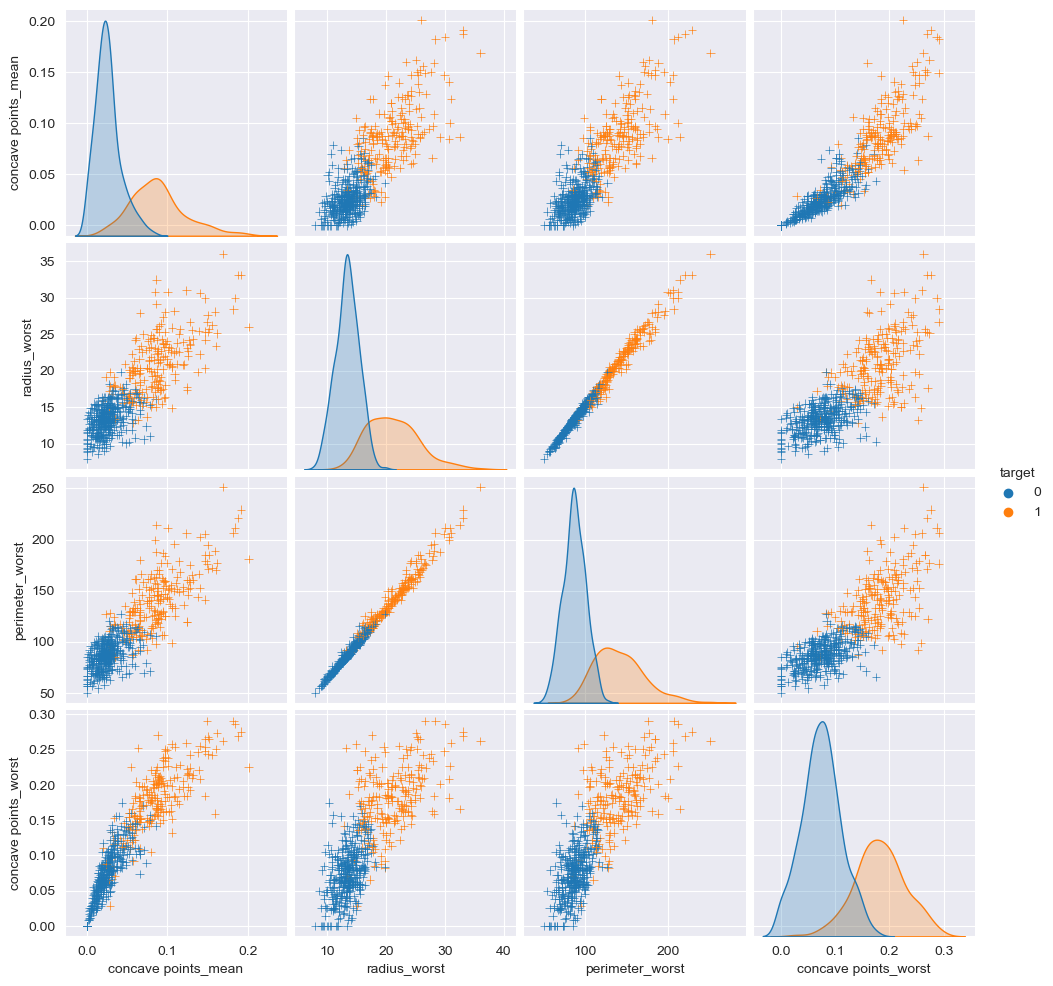

In [11]:
sns.pairplot(data[corr_features], diag_kind="kde", markers="+", hue="target")  # diag_kind="kde": to see the distribution of features. markers="+": to see the points.
plt.show()

pozitive and negative skerness: If the tail on the right side of the distribution is longer or fatter, the distribution is positively skewed. If the tail on the left side of the distribution is longer or fatter, the distribution is negatively skewed. If the distribution is symmetric, the distribution is symmetric. Gaussian distribution is symmetric. If the distribution is not Gaussian, then we need to normalize it. We do gaussian normalization.  for Skewness calculate: skewness = 3 * (mean - median) / standard deviation

OUTLIER DETECTION

In [12]:
y= data.target
x= data.drop(["target"], axis=1)
columns = x.columns.tolist()
columns

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [13]:
clf = LocalOutlierFactor() # LocalOutlierFactor: to see the outliers

In [14]:
y_pred = clf.fit_predict(x) # fit_predict: to see the outliers. Fit predict means fit and predict at the same time. It returns 1 if it is inlier. It returns -1 if it is outlier.
y_pred # -1: outlier, 1: inlier. y_pred is the outlier scores.

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

In [15]:
X_score = clf.negative_outlier_factor_ # negative_outlier_factor_: to see the outliers. It returns the outlier scores.
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
outlier_score  # outlier scores of each observation. The lower the outlier score, the more abnormal the observation. The higher the outlier score, the more normal the observation. The threshold is -1.5. If the outlier score is smaller than -1.5, it is an outlier.

,score
0,-1.422440
1,-1.066782
2,-0.978948
3,-1.596933
4,-1.069936
...,...
564,-1.330082
565,-0.997906
566,-0.997441
567,-0.993730


In [16]:
# plt.figure()
# plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color="k", s=3, label="Data Points") # s=3: size of the points. X.iloc[:, 0]: radius_mean, x.iloc[:, 1]: texture_mean
# radius = (X_score.max() - X_score) / (X_score.max() - X_score.min()) # The lower the radius score, the more abnormal the observation. The higher the radius score, the more normal the observation.
# outlier_score["radius"] = radius  # radius scores of each observation. Actually We normalized the outlier scores.  so they take values between -1 and 1
#
# plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s=1000*radius, label="Outlier Scores", edgecolors="r", facecolors="none") # s=1000*radius: size of the points. X.iloc[:, 0]: radius_mean, x.iloc[:, 1]: texture_mean. edgecolors="r": color of the edge. facecolors="none": color of the inside of the circle
# plt.legend() # to see the legend.
# plt.show()

If the circle is large, it is closest to being an outlier. If the circle is small, it is closest to being an inlier.

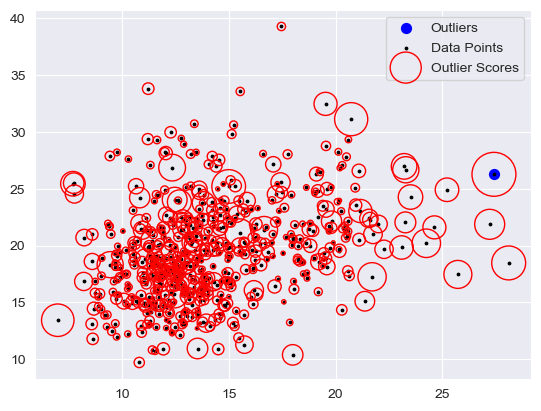

In [17]:
threshold = -2.5 # threshold for outlier score. If the outlier score is smaller than -2.5, it is an outlier.
filtre = outlier_score["score"] < threshold # outlier_score["score"]: outlier scores of each observation. If the outlier score is smaller than -2.5, it is an outlier.
outlier_index = outlier_score[filtre].index.tolist() # outlier_index: index of the outliers
plt.figure()
plt.scatter(x.iloc[outlier_index, 0], x.iloc[outlier_index, 1], color="blue", s=50, label="Outliers") # I want to see just the outliers. s=3: size of the points. X.iloc[outlier_index, 0]: radius_mean (outliers rows), x.iloc[outlier_index, 1]: texture_mean (outliers rows)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color="k", s=3, label="Data Points")
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())
outlier_score["radius"] = radius

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s=1000*radius, label="Outlier Scores", edgecolors="r", facecolors="none")
plt.legend() # to see the legend.
plt.show()

Blue points are outliers. Threshold is -2.5. If the outlier score is smaller than -2.5, it is an outlier. We drop the outliers row.

In [18]:
x = x.drop(outlier_index) # We drop the outliers row. Type of x: pandas.core.frame.DataFrame.
y = y.drop(outlier_index).values # We drop the outliers row. y.values: to see the values of y. type(y.values): numpy.ndarray (array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

Train and test split

In [19]:
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=42) # test_size=0.3: 30% of the data is test data. random_state=42: to see the same result every time.

Standardization: to see the data in the same range. We do standardization for X_train and X_test.

In [20]:
scale = StandardScaler() # StandardScaler: to see the data in the same range.
X_train = scale.fit_transform(X_train) # We do standardization for X_train.
X_test = scale.transform(X_test) # We do standardization for X_test. But just transform. We do not fit.

In [21]:
X_train_df = pd.DataFrame(X_train, columns=columns)
X_train_df.describe() # to see the mean, std, min, max, 25%, 50%, 75% of the data.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,...,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02
mean,1.789780e-17,-2.863648e-16,-7.243017e-17,-2.245615e-16,-2.125364e-17,-2.377052e-16,2.768566e-17,1.138188e-16,-1.639187e-15,6.843113e-16,...,1.216491e-16,-4.810034e-16,-4.438096e-16,-9.620069e-17,7.100394e-16,-1.185729e-16,7.187086e-17,-6.795572e-17,-6.739641e-17,3.383803e-17
std,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,...,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00
min,-1.712388e+00,-2.175361e+00,-1.632924e+00,-1.303791e+00,-2.404872e+00,-1.638974e+00,-1.126020e+00,-1.291511e+00,-2.340956e+00,-1.731378e+00,...,-1.554165e+00,-2.165353e+00,-1.558852e+00,-1.163524e+00,-2.217924e+00,-1.426295e+00,-1.351626e+00,-1.782104e+00,-2.098683e+00,-1.623010e+00
25%,-7.039450e-01,-7.291157e-01,-7.065592e-01,-6.765379e-01,-7.086599e-01,-7.677983e-01,-7.505222e-01,-7.462174e-01,-6.923019e-01,-7.154003e-01,...,-6.821946e-01,-7.528643e-01,-7.019438e-01,-6.578384e-01,-7.527979e-01,-6.715073e-01,-7.547935e-01,-7.847938e-01,-6.687460e-01,-6.938485e-01
50%,-2.446426e-01,-1.109439e-01,-2.549616e-01,-2.989145e-01,-9.870612e-02,-2.500035e-01,-3.559314e-01,-3.888829e-01,-3.575803e-02,-1.774476e-01,...,-2.715302e-01,-5.708877e-02,-2.809144e-01,-3.430225e-01,-4.097822e-02,-2.830139e-01,-2.487165e-01,-2.253839e-01,-1.273445e-01,-2.398587e-01
75%,4.919745e-01,5.648931e-01,5.336490e-01,3.852569e-01,6.086412e-01,5.418139e-01,4.663710e-01,6.740944e-01,5.587789e-01,4.845408e-01,...,4.880926e-01,6.757303e-01,5.339215e-01,2.884427e-01,6.097035e-01,5.982844e-01,5.947450e-01,7.322025e-01,4.793437e-01,4.494271e-01
max,4.033514e+00,4.645288e+00,4.063861e+00,5.327298e+00,4.767417e+00,4.097233e+00,4.417475e+00,4.049923e+00,4.490747e+00,4.845302e+00,...,3.590418e+00,3.877586e+00,3.782128e+00,4.325859e+00,3.771406e+00,4.615614e+00,3.461489e+00,2.511223e+00,5.979346e+00,5.130159e+00


After the normalization standart deviation is 1. Mean is 0.

In [22]:
X_train_df["target"] = Y_train
data_melted = pd.melt(X_train_df, id_vars="target", var_name="features", value_name="value")  # melt: to see the correlation between features.
data_melted

,target,features,value
0,0,radius_mean,-0.126206
1,1,radius_mean,1.110155
2,0,radius_mean,-1.565931
3,1,radius_mean,0.567081
4,0,radius_mean,-0.487293
...,...,...,...
11905,0,fractal_dimension_worst,1.431831
11906,0,fractal_dimension_worst,0.433970
11907,0,fractal_dimension_worst,-1.270352
11908,1,fractal_dimension_worst,1.265807


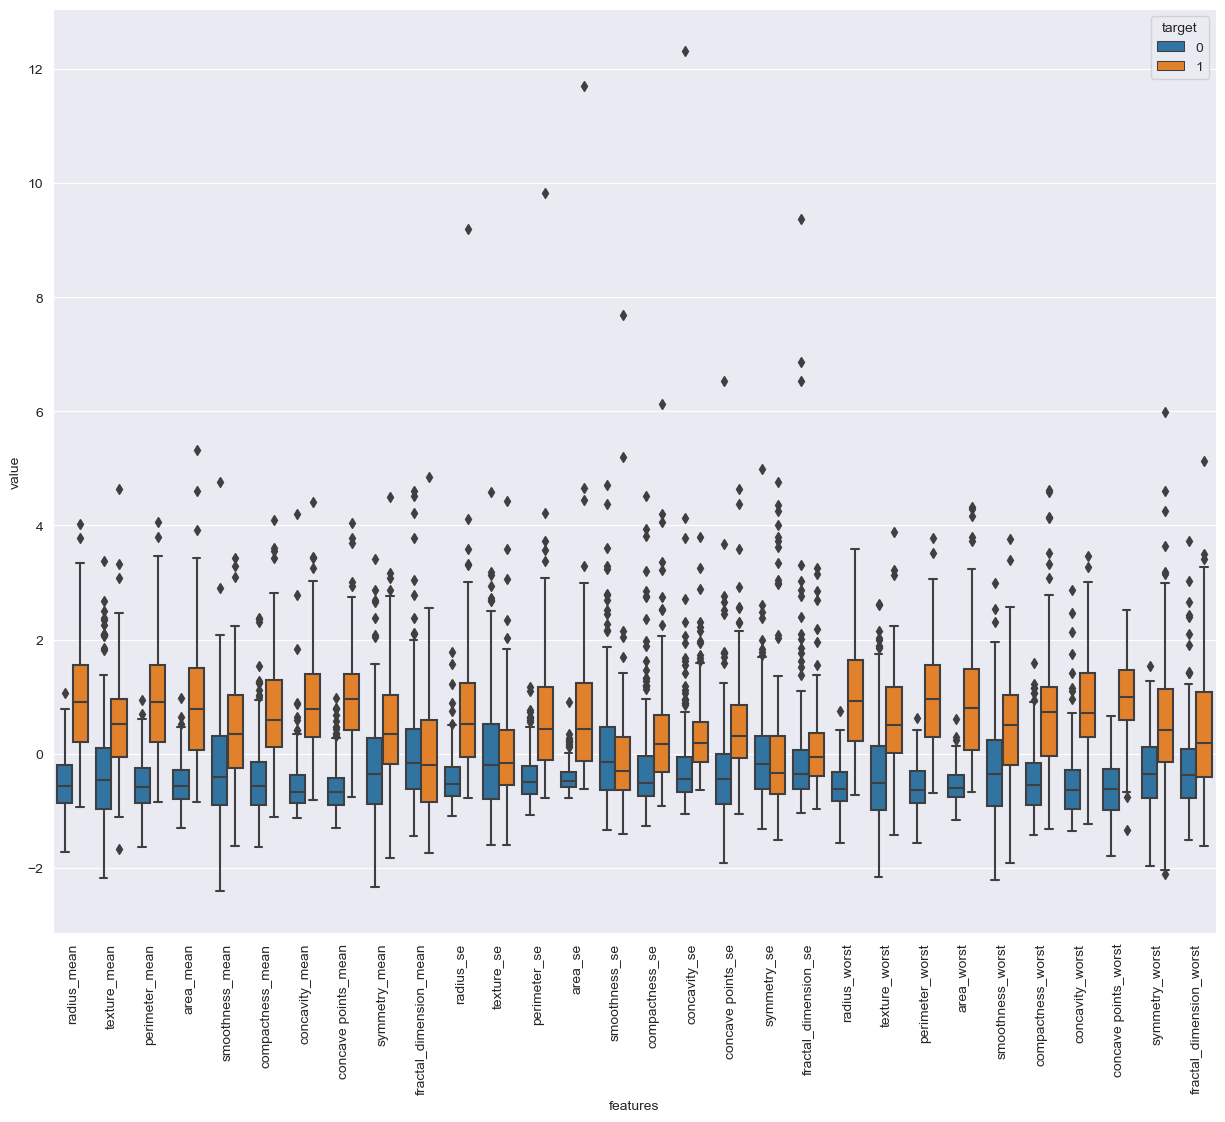

In [23]:
plt.figure(figsize=(15, 12)) # figsize: to see the size of the figure.
sns.boxplot(x="features", y="value", hue="target", data=data_melted) # hue: to see the correlation between features.    # boxplot: to see the outliers
plt.xticks(rotation=90)  # to see the features vertically
plt.show()

for example: fractal_dimension_mean: Target values in fractal_dimension_mean are difficult to separate by drawing a dash. So fractal_dimension_mean is not a good feature. But radius_mean: Target values in radius_mean are easy to separate by drawing a dash. So radius_mean is a good feature.

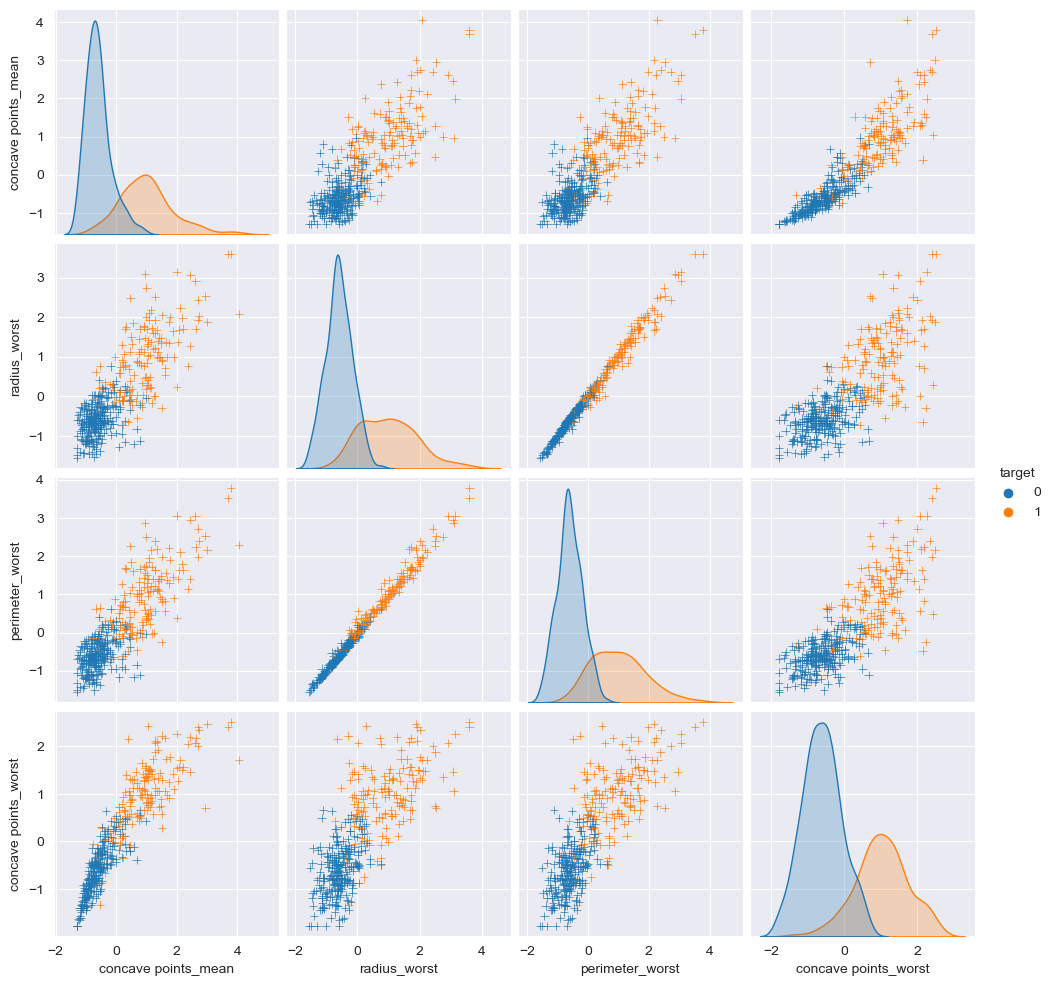

In [24]:
sns.pairplot(X_train_df[corr_features], diag_kind="kde", markers="+", hue="target")  # diag_kind="kde": to see the distribution of features. markers="+": to see the points.
plt.show()

After the normalization, Skewness does not change.

KNN: K Nearest Neighbour: KNN is a non-parametric and lazy learning algorithm. Non-parametric means that it does not make any assumptions on the underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real-world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation.

Basic KNN

In [27]:
knn = KNeighborsClassifier(n_neighbors=2) # n_neighbors=2: k=2
knn.fit(X_train, Y_train) # We fit the model.
y_pred = knn.predict(X_test) # We predict the values of X_test.

cm = confusion_matrix(Y_test, y_pred) # We create a confusion matrix. Confusion matrix: to see the accuracy of a classification. cm: array([[ 56,   7], [  1, 107]], dtype=int64). 56+107=163: correct predictions. 7+1=8: incorrect predictions.
cm

array([[108,   1],
       [  7,  55]], dtype=int64)

Confusion matrix: to see the accuracy of a classification. cm: array([[ 55,   7], [  1, 108]], dtype=int64). 56+107=163: correct predictions. 7+1=8: incorrect predictions. He correctly predicted 108 of 109 benign tumors. He correctly guessed 55 of the 62 malignant tumors.

In [29]:
acc = accuracy_score(Y_test, y_pred) # We calculate the accuracy score. # score = knn.score(X_test, Y_test) # We calculate the accuracy score.
acc

0.9532163742690059

Also look at the success of the training data to see if it's underfit or overfit.

Finding the best parameters

In [39]:
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    k_range = list(range(1, 10)) # k_range: [1, 2, 3, ..., 10]
    weight_options = ["uniform", "distance"] # weight_options: uniform, distance. Weight means that the distance between the points. uniform: all points are equal. distance: the closer points are more important.
    print()
    param_grid = dict(n_neighbors=k_range, weights=weight_options) # param_grid: n_neighbors: 1, 2, 3, ..., 10, weights: uniform, distance
    knn = KNeighborsClassifier() # knn: KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy") # grid: GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
    grid.fit(x_train, y_train) # We fit the model.
    print("Best training score: {} with parameters: {}".format(grid.best_score_, grid.best_params_)) # We print the best score and the best parameters.
    print()
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test) # We predict the values of x_test.
    y_pred_train = knn.predict(x_train) # We predict the values of x_train. To learn if it's underfit or overfit.
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ", cm_test)
    print("CM Train: ", cm_train)
    return grid

In [31]:
grid = KNN_Best_Params(X_train, X_test, Y_train, Y_test)


Best training score: 0.9670512820512821 with parameters: {'n_neighbors': 4, 'weights': 'uniform'}

Test Score: 0.9590643274853801, Train Score: 0.9773299748110831

CM Test:  [[107   2]
 [  5  57]]
CM Train:  [[248   0]
 [  9 140]]


there is no overfit as there is very little difference in score between training and testing. Less complexity less overfitting

PCA: Principal Component Analysis: PCA is an unsupervised learning algorithm that is used for dimensionality reduction. PCA is used to reduce the dimensions of the data. PCA is used to visualize the data. Reduces the size of the data by keeping as much information as possible. PCA is used to increase the speed of the machine learning algorithm.
It is used if the number of features is high. To reduce the size of the data


Text(0.5, 1.0, 'PCA: p1 vs p2')

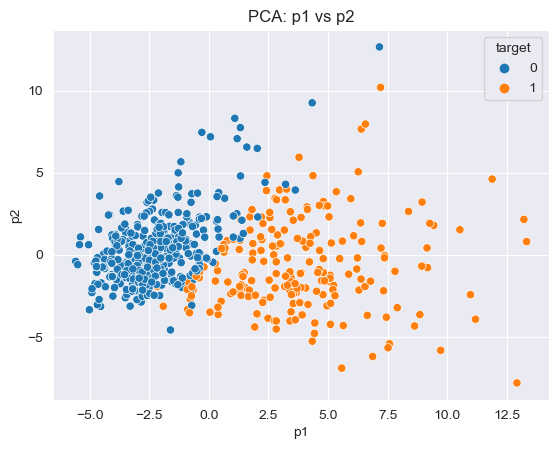

In [32]:
scale = StandardScaler() # Why do we do standardization? Because PCA is sensitive to the variance of the features. Also PCA is unsupervised learning. So we do not need to split the data into train and test.
x_scaled = scale.fit_transform(x) # We fit and transform the data.

pca = PCA(n_components=2) # n_components=2: We want to reduce the number of features to 2.
pca.fit(x_scaled) # We fit the model with the scaled data.
x_reduced_pca = pca.transform(x_scaled) # We transform the data.
pca_data = pd.DataFrame(x_reduced_pca, columns=["p1", "p2"]) # We create a DataFrame with reduced features.
pca_data["target"] = y # We add target data to the DataFrame. For visualization.
sns.scatterplot(x="p1", y="p2", hue="target", data=pca_data) # We visualize the data.
plt.title("PCA: p1 vs p2")

We reduced the number of features from 30 to 2.

In [40]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(x_reduced_pca, y, test_size=0.3, random_state=42) # We split the data into train and test.
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca) # We find the best parameters for the model.


Best training score: 0.9419230769230769 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Test Score: 0.9239766081871345, Train Score: 0.947103274559194

CM Test:  [[103   6]
 [  7  55]]
CM Train:  [[241   7]
 [ 14 135]]


Meshgrid: We create a rectangular grid out of an array of x values and an array of y values.

Text(0.5, 1.0, "2-Class classification (k = 9, weights = 'uniform')")

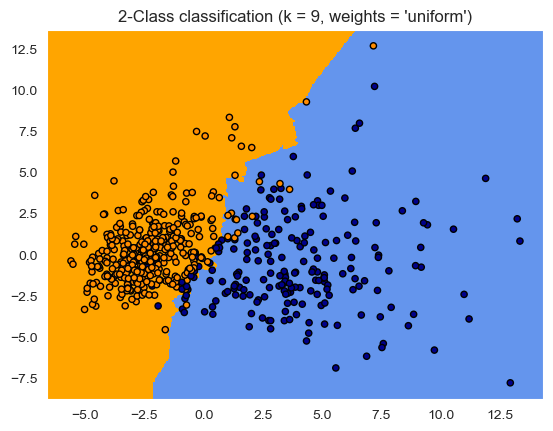

In [41]:
# visualize
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = x_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))


Now we can see the erroneous data better.

NCA: Neighborhood Components Analysis: NCA is a supervised learning algorithm that is used for dimensionality reduction. NCA is used to reduce the dimensions of the data. NCA is used to visualize the data. Reduces the size of the data by keeping as much information as possible. NCA is used to increase the speed of the machine learning algorithm.

NCA is a supervised learning algorithm. So we need to split the data into train and test. Rather than using a random distance metric, the NCA learns this metric itself by finding the linear transform.


Text(0.5, 1.0, 'NCA: p1 vs p2')

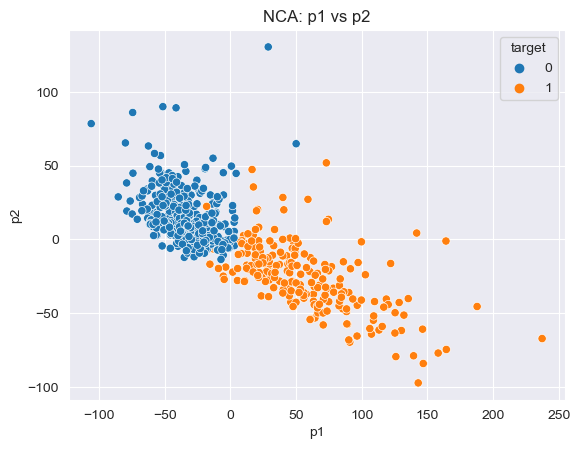

In [42]:
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=42) # n_components=2: We want to reduce the number of features to 2.
nca.fit(x_scaled, y) # We fit the model with the scaled data.
x_reduced_nca = nca.transform(x_scaled) # We transform the data.
nca_data = pd.DataFrame(x_reduced_nca, columns=["p1", "p2"]) # We create a DataFrame with reduced features.
nca_data["target"] = y # We add target data to the DataFrame. For visualization.
sns.scatterplot(x="p1", y="p2", hue="target", data=nca_data) # We visualize the data.
plt.title("NCA: p1 vs p2")

In [43]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(x_reduced_nca, y, test_size=0.3, random_state=42) # We split the data into train and test.
grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca) # We find the best parameters for the model.


Best training score: 0.9873076923076922 with parameters: {'n_neighbors': 1, 'weights': 'uniform'}

Test Score: 0.9941520467836257, Train Score: 1.0

CM Test:  [[108   1]
 [  0  62]]
CM Train:  [[248   0]
 [  0 149]]


We got a very good score. So little bias and little variance

Text(0.5, 1.0, "2-Class classification (k = 1, weights = 'uniform')")

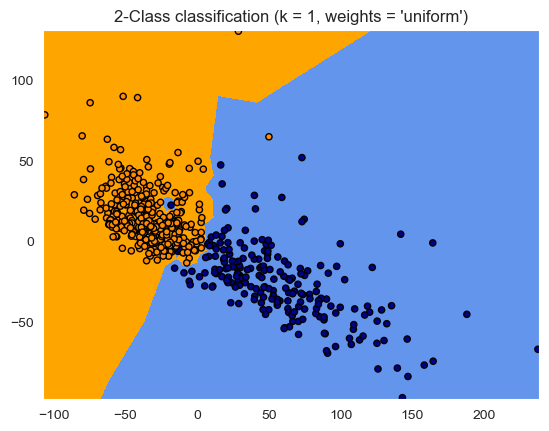

In [44]:
# visualize
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .2 # step size in the mesh
X = x_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))

We saw which data was wrong in the scatter we used in this meshgrid. We can see the data that is wrong in the scatter we used in the meshgrid.

Finding Wrong Data: We can find the wrong data by comparing the predicted values with the actual values.

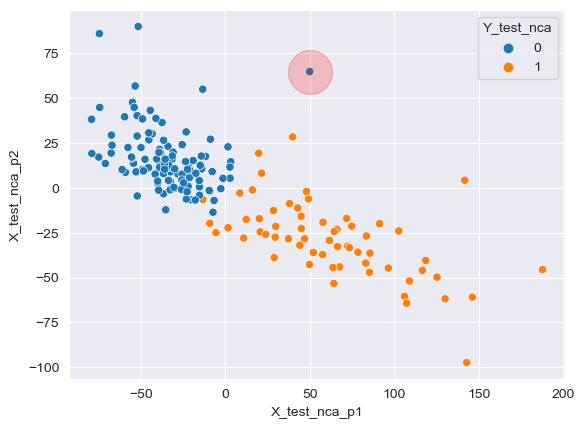

In [45]:
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,Y_train_nca)
y_pred_nca = knn.predict(X_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,Y_test_nca)
knn.score(X_test_nca,Y_test_nca)

test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = X_test_nca[:,0]
test_data["X_test_nca_p2"] = X_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = Y_test_nca

plt.figure()
sns.scatterplot(x="X_test_nca_p1", y="X_test_nca_p2", hue="Y_test_nca",data=test_data)

diff = np.where(y_pred_nca!=Y_test_nca)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified",alpha = 0.2,color = "red",s = 1000)


We saw misclassifications in the test dataset